# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson.

<img src="https://i.imgur.com/49FNOHj.jpg">

# Import Statements

In [194]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [195]:
colors_df = pd.read_csv('./data/colors.csv')
colors_df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [196]:
colors_df['name'].nunique()

135

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [197]:
colors_df.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [198]:
colors_df['is_trans'].value_counts()

f    107
t     28
Name: is_trans, dtype: int64

In [199]:
no_trans_colors = colors_df[['is_trans']].query('is_trans == "f"').count()
trans_colors = colors_df[['is_trans']].query('is_trans == "t"').count()
print(f'The number of no-transparent colors is {no_trans_colors[0]}')
print(f'The number of transparent colors is {trans_colors[0]}')

The number of no-transparent colors is 107
The number of transparent colors is 28


In [200]:
no_trans_colors = colors_df[colors_df['is_trans'] == 'f'].count()
trans_colors = colors_df[colors_df['is_trans'] == 't'].count()
print(f'The number of no-transparent colors is {no_trans_colors[0]}')
print(f'The number of transparent colors is {trans_colors[0]}')

The number of no-transparent colors is 107
The number of transparent colors is 28


**Challenge**: Change this into an h3 section heading: Understanding LEGO Themes vs. LEGO Sets

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png

<img src='https://i.imgur.com/aKcwkSx.png'>

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: Display this image https://i.imgur.com/whB1olq.png

<img src=' https://i.imgur.com/whB1olq.png'>

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows.

In [201]:
sets_df = pd.read_csv('./data/sets.csv', parse_dates=True)
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [202]:
sets_df.loc[[sets_df['year'].idxmin()]]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [203]:
sets_df[sets_df['year'] == sets_df['year'].min()]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: Find the top 5 LEGO sets with the most number of parts.

In [204]:
sets_df.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019?

In [205]:
sets_by_year = sets_df.groupby('year').count()
sets_by_year['set_num'].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames.

<Axes: title={'center': 'Number of Lego Sets by Year.'}, xlabel='Year', ylabel='Number of Sets'>

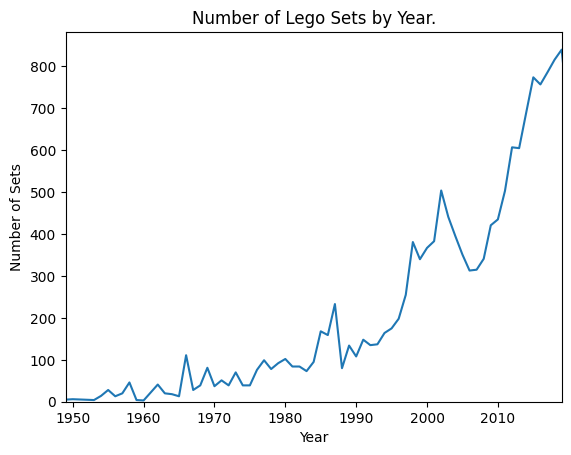

In [206]:
sets_by_year['set_num'].plot(ylim=0, xlim=[1949, 2019], title='Number of Lego Sets by Year.', xlabel='Year', ylabel='Number of Sets')

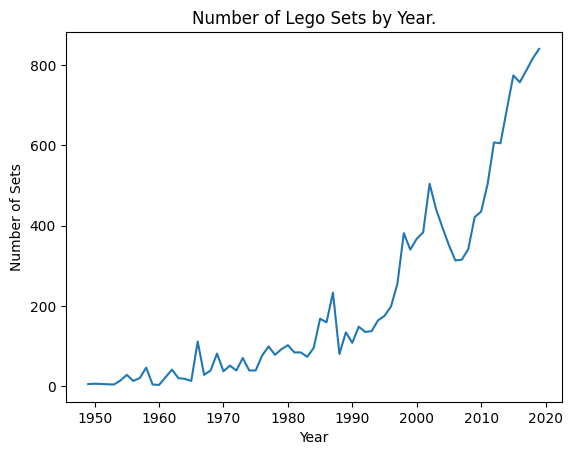

In [207]:
plt.title('Number of Lego Sets by Year.')
plt.xlabel('Year')
plt.ylabel('Number of Sets')
plt.plot(sets_by_year.index[:-2], sets_by_year['set_num'][:-2])

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [208]:
themes_by_year =  sets_df.groupby('year').agg({'theme_id': pd.Series.nunique})
themes_by_year.head()

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4


Rename the column to a more proper name, like nr_themes.

In [209]:
# Rename the column
themes_by_year.rename(columns={'theme_id': 'nr_themes'}, inplace=True)
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [210]:
# ALTERNATIVE
themes_by_year = sets_df.groupby('year')[['theme_id']].nunique()
themes_by_year.columns = ['nr_themes']
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021).

<Axes: title={'center': 'Number of Unique Lego Themes by Year.'}, xlabel='Year', ylabel='Number of Themes'>

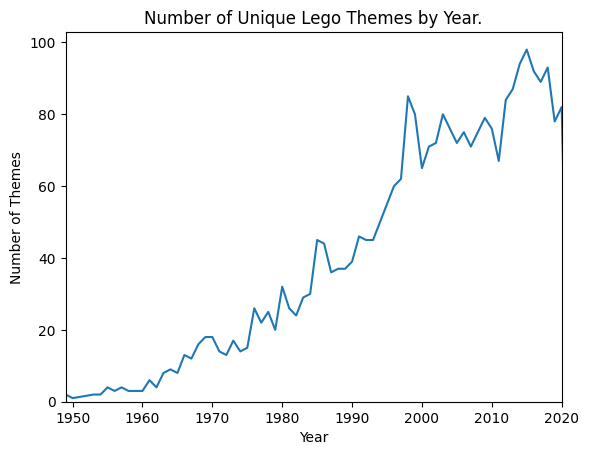

In [211]:
themes_by_year['nr_themes'].plot(ylim=0, xlim=[1949, 2020], title='Number of Unique Lego Themes by Year.', xlabel='Year', ylabel='Number of Themes')

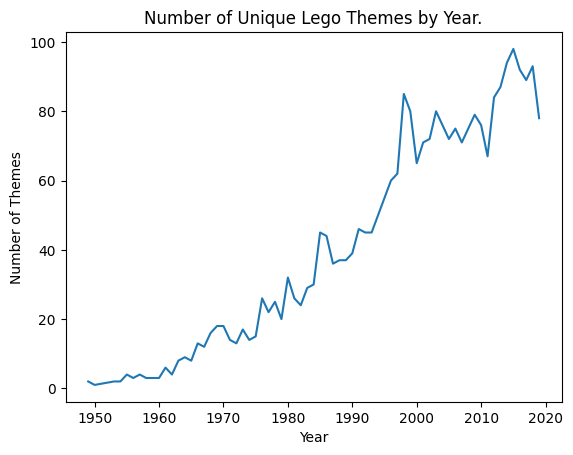

In [212]:
plt.title('Number of Unique Lego Themes by Year.')
plt.xlabel('Year')
plt.ylabel('Number of Themes')
plt.plot(themes_by_year.index[:-2], themes_by_year['nr_themes'][:-2])

### Line Charts with Two Seperate Axes

Wouldn't it be nice to have the number of themes and the number sets on the same chart? But what do we get if we just plot both of them the way we have before?

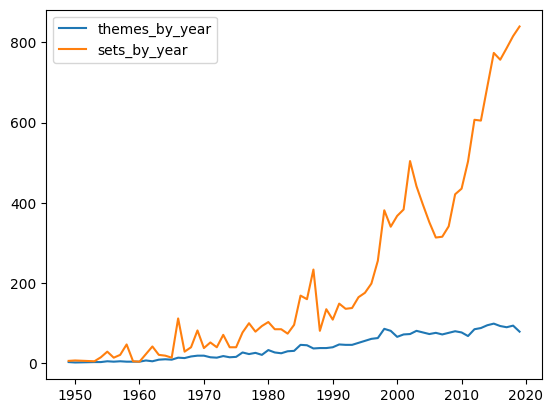

In [213]:
plt.plot(themes_by_year.index[:-2], themes_by_year['nr_themes'][:-2], label='themes_by_year')
plt.plot(sets_by_year.index[:-2], sets_by_year['set_num'][:-2], label='sets_by_year')
plt.legend()

That's not very informative! The problem is that the "number of themes" and the "number of sets" have very different scales. The theme number ranges between 0 and 90, while the number of sets ranges between 0 and 900. So what can we do?

We should use **Two Separate Axes**.

We need to be able to configure and plot our data on two separate axes on the same chart. This involves getting hold of an axis object from Matplotlib.

We then create another axis object: ax2. The key thing is that by using the .twinx() method allows ax1 and ax2 to share the same x-axis. When we plot our data on the axes objects we get this:

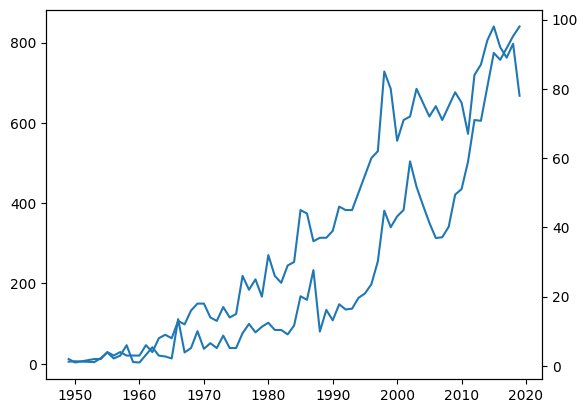

In [214]:
ax1 = plt.gca() # get current axis
ax2 = ax1.twinx() # create another axis that shares the same x-axis

ax1.plot(sets_by_year.index[:-2], sets_by_year['set_num'][:-2])
ax2.plot(themes_by_year.index[:-2], themes_by_year['nr_themes'][:-2])

To make it more clear we will add some color an labels.

Text(0, 0.5, 'Number of Themes')

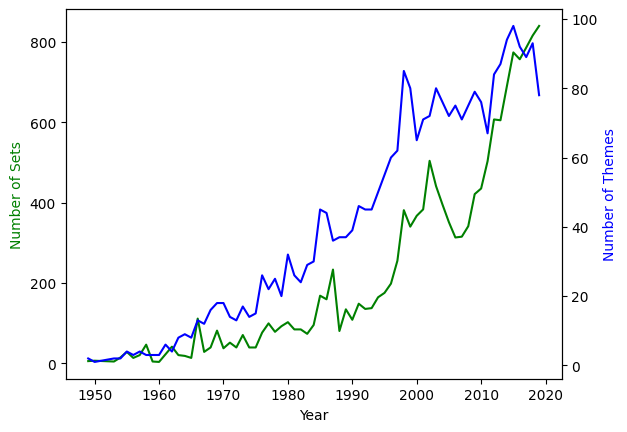

In [215]:
ax1 = plt.gca() # get current axis
ax2 = ax1.twinx() # create another axis that shares the same x-axis

ax1.plot(sets_by_year.index[:-2], sets_by_year['set_num'][:-2], color='g')
ax2.plot(themes_by_year.index[:-2], themes_by_year['nr_themes'][:-2], color='b')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets', color='green')
ax2.set_ylabel('Number of Themes', color='blue')

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [216]:
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [217]:
parts_per_set = sets_df.groupby('year').agg({'num_parts': pd.Series.mean})
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


In [218]:
# ALTERNATIVE
parts_per_set = sets_df.groupby('year')[['num_parts']].mean()
parts_per_set.tail()

,num_parts
year,
2017,221.840967
2018,213.618873
2019,207.510714
2020,259.732938
2021,0.000000


In [219]:
print('Average number of parts in 1954: ' + str(parts_per_set.loc[1949, 'num_parts']))
print('Average number of parts in 2017: ' + str(parts_per_set.loc[2017, 'num_parts']))

Average number of parts in 1954: 99.6
Average number of parts in 2017: 221.8409669211196


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart?

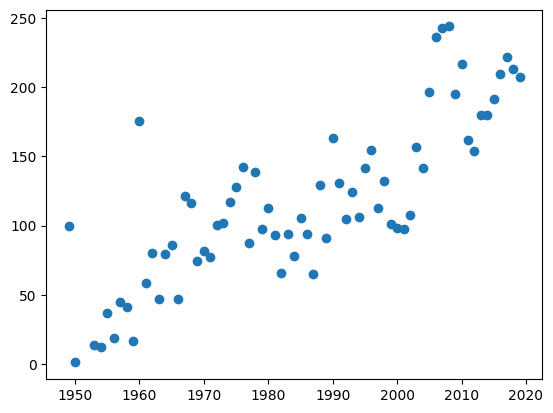

In [220]:
plt.scatter(parts_per_set.index[:-2], parts_per_set['num_parts'][:-2])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets?

In [221]:
set_theme_count = sets_df['theme_id'].value_counts()
set_theme_count[:5]

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

In [222]:
sets_df[sets_df['theme_id'] == set_theme_count.idxmax()].head()

,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94


By searching by the theme_id number and looking at the set names we can figure out that the theme is related to Star Wars but this is only by looking and is not very helpful. We need to find the names of the themes based on the theme_id from the themes.csv file.

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<img src="https://i.imgur.com/Sg4lcjx.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv.

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [223]:
themes_df = pd.read_csv('./data/themes.csv')
themes_df.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [224]:
themes_df[themes_df['id'] == set_theme_count.idxmax()]

,id,name,parent_id
150,158,Star Wars,NaN


In [225]:
themes_df[themes_df['name'] == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [226]:
star_wars_ids = themes_df[themes_df['name'] == 'Star Wars']['id'].to_list()

In [227]:
sets_df[sets_df['theme_id'].isin(star_wars_ids)].head()

,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94


In [228]:
sets_df[sets_df['theme_id'].isin(star_wars_ids)]["theme_id"].value_counts()

158    753
18      11
209     10
261      2
Name: theme_id, dtype: int64

### Merging (i.e., Combining) DataFrames based on a Key


Wouldn't it be nice if we could combine our data on theme names with the number sets per theme?

Let's use the .merge() method to combine two separate DataFrames into one. The merge method works on columns with the same name in both DataFrames.

Currently, our theme_ids and our number of sets per theme live inside a Series called set_theme_count.

In [229]:
set_theme_count.head()

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

To make sure we have a column with the name id, we'll convert this Pandas Series into a Pandas DataFrame by providing a dictionary to create the DataFrame. The keys in the dictionary become the column names.


In [230]:
set_theme_count = pd.DataFrame({'id': set_theme_count.index, 'set_count': set_theme_count.values})
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [239]:
merged_df = pd.merge(set_theme_count, themes_df, on='id')
merged_df.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


In [241]:
merged_df.tail()

,id,set_count,name,parent_id
566,307,1,Aquazone,NaN
567,215,1,Pirates,207.0
568,361,1,Skull Spiders,324.0
569,210,1,Belville,207.0
570,414,1,Castle,411.0


**Creating a Bar Chart**

Matplotlib can create almost any chart imaginable with very few lines of code. Using .bar() we can provide our theme names and the number of sets. Let's plot the first 10 rows from the merged_df.

<BarContainer object of 10 artists>

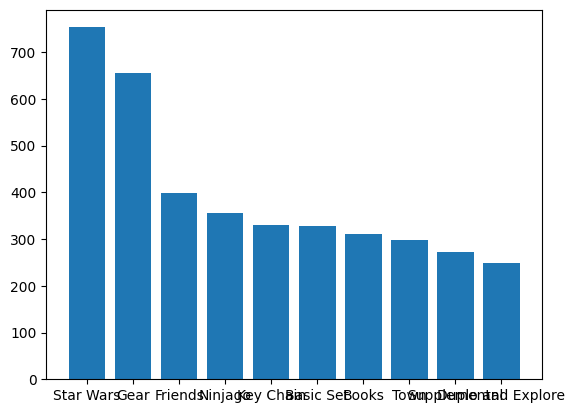

In [246]:
plt.bar(merged_df.name[:10], merged_df['set_count'][:10])

We need to customize the graph to make it readeable.

<BarContainer object of 10 artists>

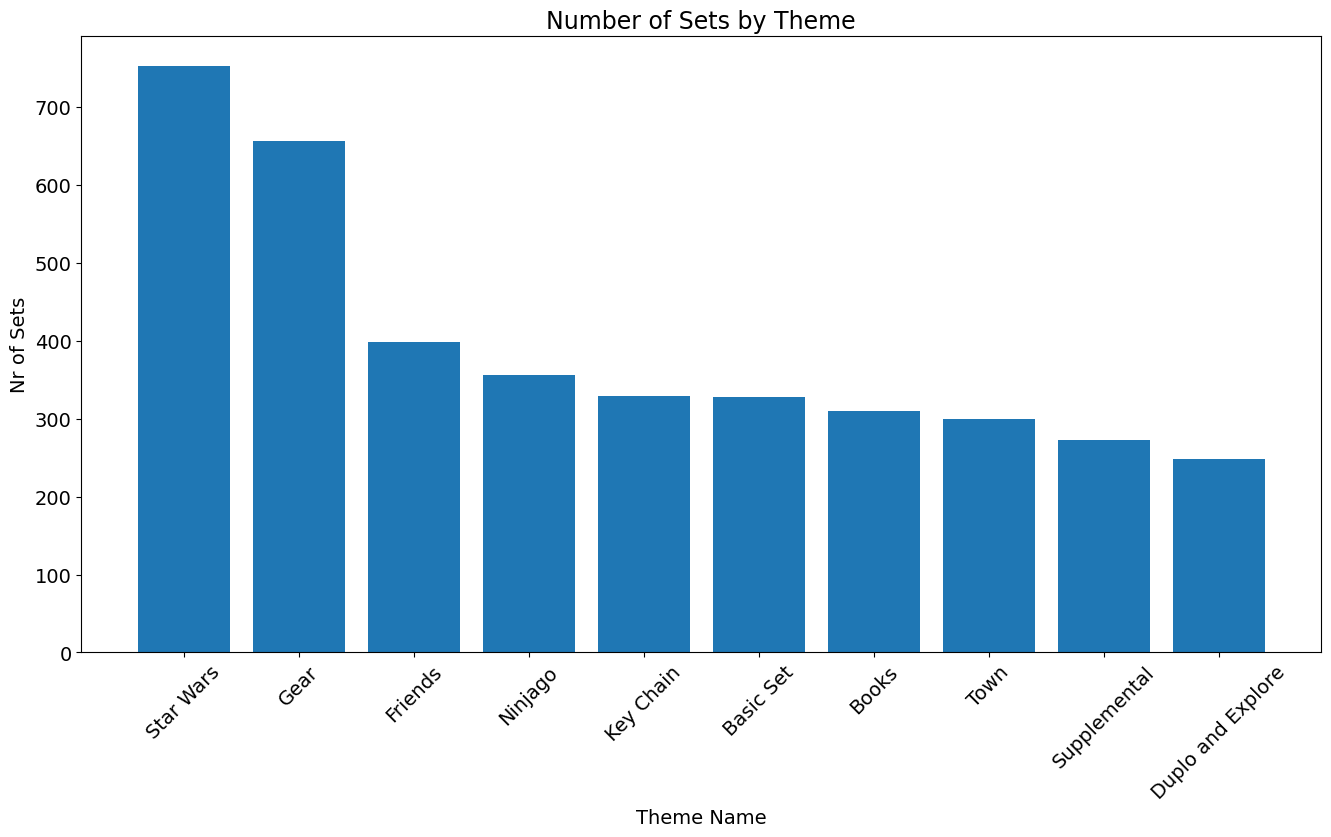

In [266]:
plt.figure(figsize=(16, 8))
plt.title('Number of Sets by Theme', fontsize=17)
plt.xlabel('Theme Name', fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.bar(merged_df.name[:10], merged_df['set_count'][:10])

<Axes: title={'center': 'Number of Sets by Theme'}, xlabel='Theme Name', ylabel='Nr of Sets'>

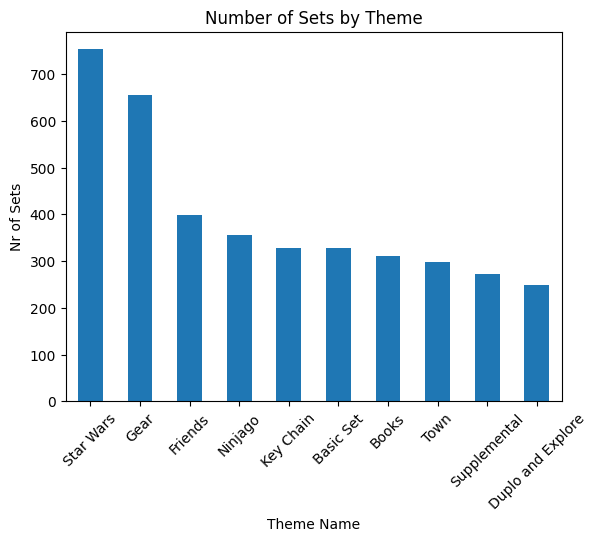

In [269]:
0# ALTERNATIVE
merged_df[:10].plot("name", "set_count", kind='bar', title="Number of Sets by Theme", xlabel="Theme Name", ylabel="Nr of Sets", rot=45, legend=False)